### Kaggle Dataset: https://www.kaggle.com/spscientist/students-performance-in-exams/version/1

### Notes to self, Plan of action
* For visualizations, watch a few videos about possible visualizations and then note down which visualizations would make sense and attempt them
* Note down all visualizations and their purpose to the project
* Bring up appropriate documenation and go to Kash to debug

In [1]:
# Pandas is a library for basic data analysis
import pandas as pd

# NumPy is a library for advanced mathematical computation
import numpy as np

# MatPlotLib is a library for basic data visualization
import matplotlib.pyplot as plt

# SeaBorn is a library for advanced data visualization
import seaborn as sns

import glob

In [2]:
df = pd.read_csv('../datasets/StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## At first glance, the data seems pretty clean
* No NaN values by columns
* Columns are type consistent
* There is only a single dataframe

### Cleaning done:
* Added a score average column to the dataframe: (math score, reading score, writing score)/3

# Cleaning

In [4]:
df['score average'] = np.nan

In [5]:
# Iterate over each row and calculate the score score average ---> set the row value to that average
for i, row in df.iterrows():
    score_average = (row["math score"] + row["reading score"] + row["writing score"])//3
    score_average = pd.to_numeric(score_average, "integer")
    df.set_value(i,'score average',score_average)
    
# Cast entire column to type integer
df["score average"] = df["score average"].astype("int64")
    


/Users/natepill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score average
0,female,group B,bachelor's degree,standard,none,72,72,74,72
1,female,group C,some college,standard,completed,69,90,88,82
2,female,group B,master's degree,standard,none,90,95,93,92
3,male,group A,associate's degree,free/reduced,none,47,57,44,49
4,male,group C,some college,standard,none,76,78,75,76


In [7]:
''' Testing to see if there are inconsistencies in the datatype'''
# df['gender'].unique()
# df['race/ethnicity'].unique()
# df['parental level of education'].unique()
# df['lunch'].unique()
df['test preparation course'].unique()
# df['math score'].unique()
# df['reading score'].unique()
# df['writing score'].unique()

array(['none', 'completed'], dtype=object)

In [8]:
## Comparing the test scores of males and females wholistically
## Plot the trends of the correlation between parental level of education and averaged test scores
## Compare the test scores for each subject by gender (Thinking simple bar graph)
## What is the affect of lunch type on averaged test scores
## visualize how parental level of education correlates to what lunch type the students recieved

In [9]:
y_pos = np.arange(len(df["parental level of education"].unique()))

In [10]:
# plt.xticks(y_pos, df["parental level of education"])
# plt.bar(y_pos, df["score average"])

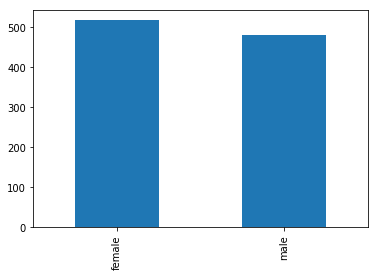

In [11]:
''' I want to make multiple bar graphs that depict the relation between most of the columns categories and the different types of test scores.'''

index = df["gender"].unique()
scores_df = df[["math score","reading score","writing score","score average"]]

df['gender'].value_counts().plot(kind='bar')

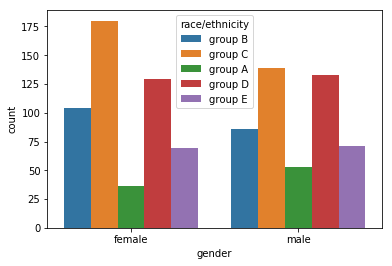

In [12]:
'''Count plot '''

sns.countplot(x="gender", hue="race/ethnicity", data=df)

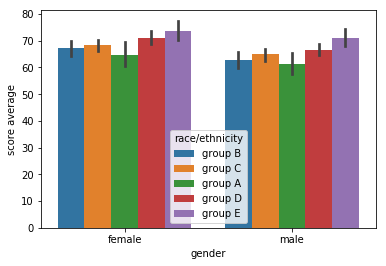

In [13]:
'''The average scores achieved by males and females based on race/ethnicity'''

sns.barplot(x="gender", y="score average", hue="race/ethnicity", data=df)

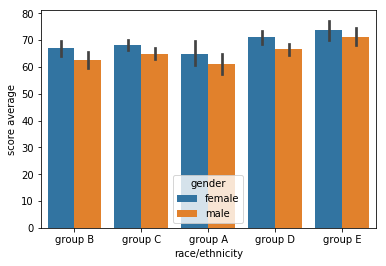

In [14]:
sns.barplot(x="race/ethnicity", y="score average", hue="gender", data=df)

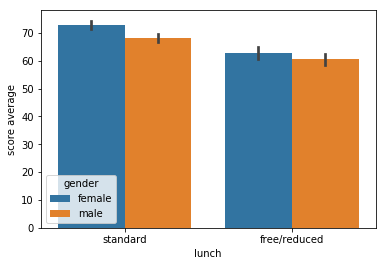

In [37]:
sns.barplot(x="lunch", y="score average", hue="gender", data=df)

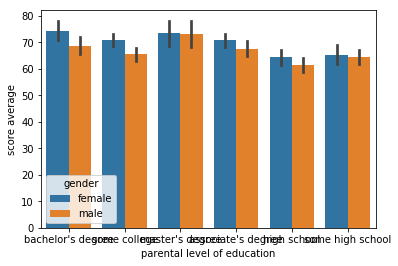

In [38]:
sns.barplot(x="parental level of education", y="score average", hue="gender", data=df)

In [ ]:
# boxplt = scores_df.plot.box()

# boxplt

In [50]:
'''Setting up dataframes with scores by test type and comparing them to the test scores average'''

scores_df = df[["math score", "reading score", "writing score", "score average"]]

math_scores_df = df[["math score", "score average"]]
reading_score_df = df[["reading score", "score average"]]
writing_score_df = df[["writing score", "score average"]]


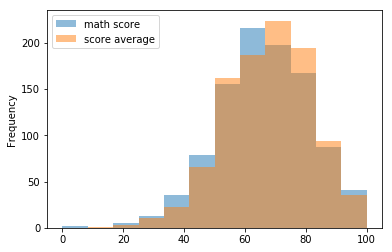

In [49]:
math_hist = math_scores_df.plot.hist(bins=12, alpha=0.5)
math_hist

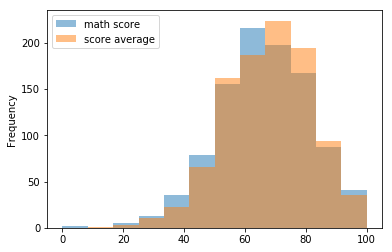

In [51]:
math_hist = math_scores_df.plot.hist(bins=12, alpha=0.5)
math_hist

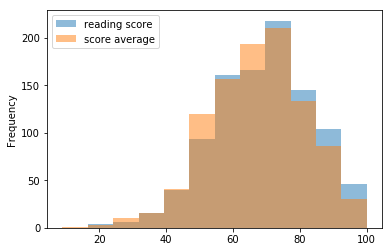

In [52]:
reading_hist = reading_score_df.plot.hist(bins=12, alpha=0.5)
reading_hist

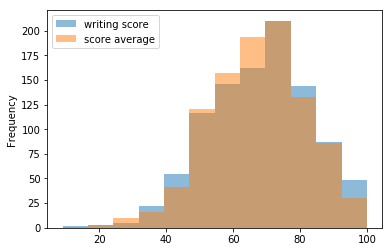

In [53]:
writing_hist = writing_score_df.plot.hist(bins=12, alpha=0.5)
writing_hist

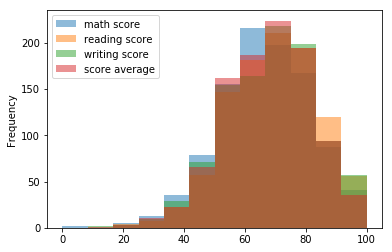

In [54]:
hist = scores_df.plot.hist(bins=12, alpha=0.5)
hist

In [16]:
'''Histograms help us visualization the distribution of the data across a dataframe. We can create several histograms by creating unique dataframes by category'''

#NOTE: Not sure if this is a distribution of what I'm looking for?

males = df[df["gender"] == "male"]["math score"]

# males
# hist = males.plot.hist(bins=12, alpha=0.5)
# hist



In [18]:
'''We can use pie charts to visulize data percentages, slicing dataframes to answer questions like visualize what percenta'''


test_prep_and_passing = df[(df["test preparation course"] == "completed") & (df["math score"] > 70)]

len(test_prep_and_passing)/len(df)

# test_prep_and_passing.head()
# test_prep_and_passing.plot.pie(subplots=True, figsize=(8, 4))

# df.plot.pie(y="test preparation course")




0.168

In [25]:
'''Adding a column to identify wheter a student failed or passed an exam'''

df['pass'] = df['math score'].apply(lambda x: x > 70)

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score average,pass
0,female,group B,bachelor's degree,standard,none,72,72,74,72,True
1,female,group C,some college,standard,completed,69,90,88,82,False
2,female,group B,master's degree,standard,none,90,95,93,92,True
3,male,group A,associate's degree,free/reduced,none,47,57,44,49,False
4,male,group C,some college,standard,none,76,78,75,76,True


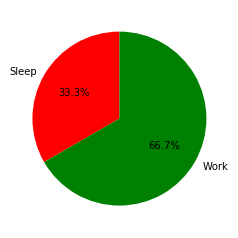

In [55]:
'''TEST example pie chart'''
import matplotlib.pyplot as plt
slices_hours = [4, 8]
activities = ['Sleep', 'Work']
colors = ['r', 'g']
plt.pie(slices_hours, labels=activities, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()



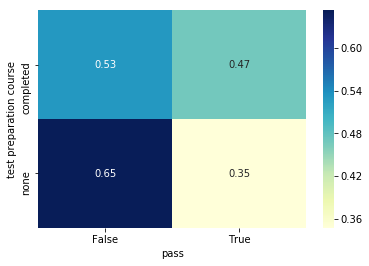

In [36]:
# plt.pie(df['test preparation course'], labels=[len(df["pass"] == True), len(df["pass"] == False)])

# sns.heatmap(pd.crosstab(df['test preparation course'], df['pass']))


sns.heatmap(pd.crosstab(df['test preparation course'], df['pass'], normalize='index'), cmap="YlGnBu", annot=True)

# df["pass"].unique()

# An “Executive Summary” of Your Findings
* Your presentation should begin with a highly visual “executive summary” slide or page that gives a brief overview of all the important aspects about your project, including but not limited to:
* Where your data came from
* What questions you were looking to answer
* A brief summary of your methodology for answering these questions
* Graphs and other visualizations that clearly explain your findings (ideally, conclusions)
